## Notebook to evaluate tomography reconstruction schemes

### Imports/Function definitions

In [1]:
import matplotlib.pyplot as plt                 # For normal plotting
from mpl_toolkits.mplot3d import proj3d         # For 3D plotting
import numpy as np                              # For maths
from scipy import ndimage                       # For image rotations
from scipy import optimize                      # For function minimization
import astra                                    # For tomography framework
import copy                                     # For deep copying arrays
import tomopy                                   # For 3D Shepp-Logan phantom

import RegTomoReconMulti as rtr                 # Modified version of Rob's CS code
import multi_axis                               # My custom functions

Compilation successful


### Full example

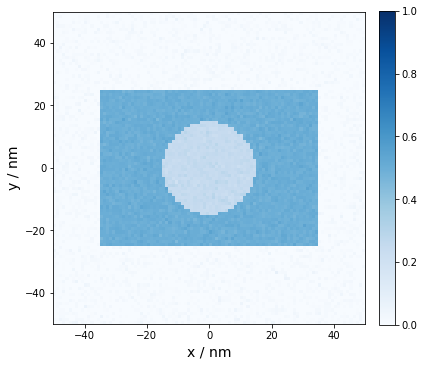

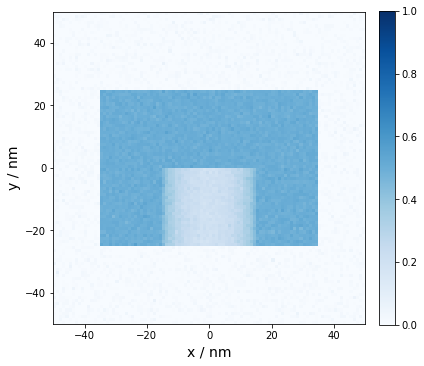

In [3]:
# Generate phantom
#X,Y,Z,P = multi_axis.generate_tri_pris()
#X,Y,Z,P = multi_axis.generate_tetrapod(r_tet=50,r_cyl=6)
X,Y,Z,P = multi_axis.generate_pillar_cavities()
#X,Y,Z,P = multi_axis.generate_sphere()
#X,Y,Z,P = multi_axis.generate_layered_rod()

Pn = multi_axis.noisy(P,noise_typ='poisson',val_pois=300)
Pn = multi_axis.noisy(Pn,noise_typ='gauss',g_var=.01)
Pn = multi_axis.noisy(Pn,noise_typ='s&p',p_sp=0.005)


# View in 2D
multi_axis.plot_2d(X,Y,Z,Pn)

# Rotate 90 about +x and view again
Pr = multi_axis.rotate_bulk(Pn,90,0,0)
multi_axis.plot_2d(X,Y,Z,Pr)

In [4]:
# Generate projection data
angles = multi_axis.generate_angles()
raw_data = multi_axis.generate_proj_data(Pn,angles)
vectors = multi_axis.generate_vectors(angles)

In [5]:
# Perform reconstruction
recon = multi_axis.generate_reconstruction(raw_data,vectors,algorithm='TV1')

Started reconstruction... Finished after 10 s


In [6]:
# Match orientation of reconstruction to phantom
recon_vector = multi_axis.reorient_reconstruction(recon)

Phantom error:  0.2826107886842955 COD:  0.912409456869


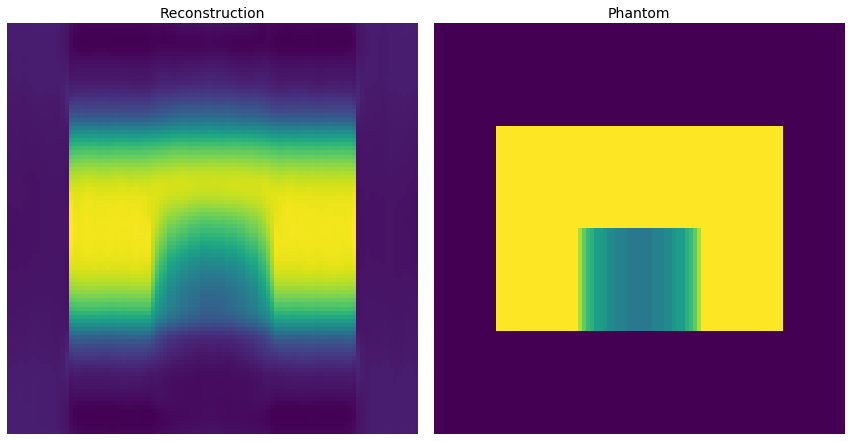

In [8]:
# Compare reconstruction to original
multi_axis.compare_recon_phantom(recon_vector,P,ax=90)

## Plot Phantoms

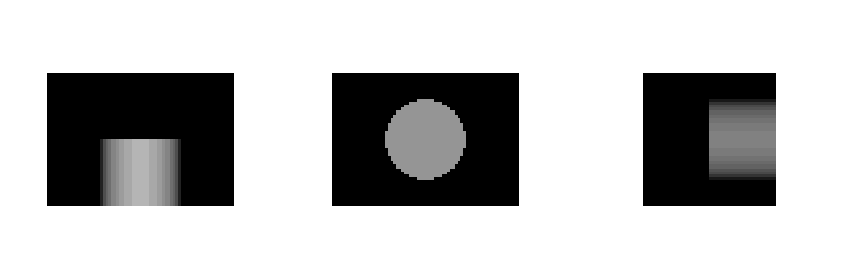

In [45]:
# Plot each phantom

#X,Y,Z,P = multi_axis.generate_tri_pris()
#X,Y,Z,P = multi_axis.generate_tetrapod()
X,Y,Z,P = multi_axis.generate_pillar_cavities()
#X,Y,Z,P = multi_axis.generate_sphere()
#X,Y,Z,P = multi_axis.generate_layered_rod()
#P = tomopy.misc.phantom.shepp3d(size=100)
Pn = P
#Pn = multi_axis.noisy(P,noise_typ='poisson',val_pois=1)

fig= plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)
ax2.imshow(np.flipud(np.mean(Pn,axis=2).T),cmap='Greys')
ax1.imshow(np.flipud(np.mean(multi_axis.rotate_bulk(Pn,90,0,0),axis=2).T),cmap='Greys')
ax3.imshow(np.flipud(np.mean(multi_axis.rotate_bulk(Pn,0,90,0),axis=2).T),cmap='Greys')

ax1.axis('off'),ax2.axis('off'),ax3.axis('off')
plt.tight_layout()

### Plot collection schemes

In [30]:
%matplotlib qt
%matplotlib qt

(-1, 1)

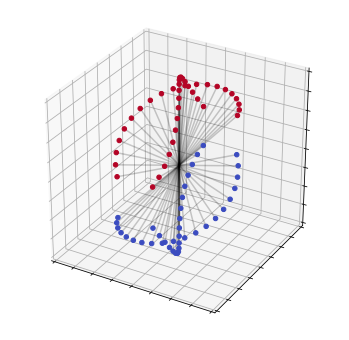

In [35]:
# plot collection schemes
%matplotlib inline
fig = plt.figure(figsize=(6,6))
ax1 = fig.gca(projection='3d')


angles = multi_axis.generate_angles(mode='sync',tilt2='beta',dist_n2=8)

bs = []
for i,a in enumerate(angles):
    mrot = multi_axis.rotation_matrix(a[0],a[1],a[2])
    b = np.dot(mrot,[0,0,1])
    bs.append(b)
    plt.plot([-b[0],b[0]],[-b[1],b[1]],[-b[2],b[2]],'-',color='k',alpha=.2)
    ax1.scatter([-b[0],b[0]],[-b[1],b[1]],[-b[2],b[2]],c=[-b[2],b[2]],s=20,cmap='coolwarm',alpha=1)
    #ax1.scatter([-b[0],b[0]],[-b[1],b[1]],[-b[2],b[2]],c=i,s=20,cmap='coolwarm',alpha=1)

ax1.set_yticklabels([])
ax1.set_xticklabels([])
ax1.set_zticklabels([])
# plt.xlabel('x',fontsize='20')
# plt.ylabel('y',fontsize='20')
# ax1.set_zlabel('z',fontsize='20')
plt.xlim([-1,1])
plt.ylim([-1,1])
ax1.set_zlim([-1,1])

## Plot algorithms

In [25]:
algs = ['BP3D_CUDA','SIRT3D_CUDA','TV1']

X,Y,Z,P = multi_axis.generate_tetrapod()

Pn = multi_axis.noisy(P,noise_typ='poisson',val_pois=300)
Pn = multi_axis.noisy(Pn,noise_typ='gauss',g_var=.01)
Pn = multi_axis.noisy(Pn,noise_typ='s&p',p_sp=0.005)

# Generate projection data
angles = multi_axis.generate_angles()
raw_data = multi_axis.generate_proj_data(Pn,angles)
vectors = multi_axis.generate_vectors(angles)

#recon
recons = []
for alg in algs:
    recon = multi_axis.generate_reconstruction(raw_data,vectors,algorithm=alg)
    recon_vector = multi_axis.reorient_reconstruction(recon)
    recons.append(recon_vector)

Started reconstruction... Finished after 1 s


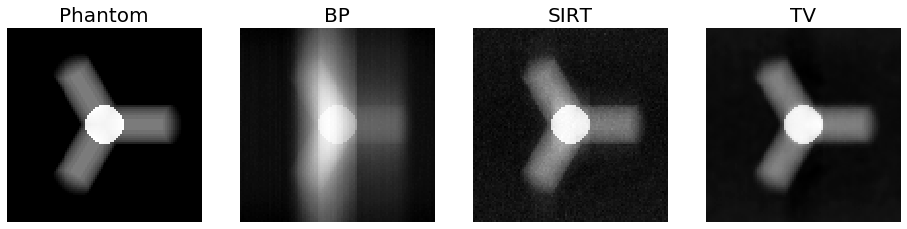

In [34]:
fig= plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(1, 4, 1)
ax2 = fig.add_subplot(1, 4, 2)
ax3 = fig.add_subplot(1, 4, 3)
ax4 = fig.add_subplot(1, 4, 4)
c='Greys_r'
ax1.imshow(np.flipud(np.mean(P,axis=2).T),cmap=c)
ax2.imshow(np.flipud(np.mean(recons[0],axis=2).T),cmap=c)
ax3.imshow(np.flipud(np.mean(recons[1],axis=2).T),cmap=c)
ax4.imshow(np.flipud(np.mean(recons[2],axis=2).T),cmap=c)

ax1.set_title('Phantom',fontsize=20)
ax2.set_title('BP',fontsize=20)
ax3.set_title('SIRT',fontsize=20)
ax4.set_title('TV',fontsize=20)

for ax in [ax1,ax2,ax3,ax4]:
    ax.axis('off')

## Scheme comparison experiment

In [14]:
# Generate phantom
X,Y,Z,P = multi_axis.generate_pillar_cavities()
Pn = multi_axis.noisy(P,noise_typ='poisson',val_pois=300)
Pn = multi_axis.noisy(Pn,noise_typ='gauss',g_var=.01)
Pn = multi_axis.noisy(Pn,noise_typ='s&p',p_sp=0.005)

In [15]:
ranges = [(90,90),(70,70),(70,30),(70,5),(50,30),(50,5),(30,30),(30,5)]
for r in ranges:
    a,b = r[0],r[1]
    title = r'Parameter tests/pillar schemes n20 TV1/a%i_b%i.npy' %(a,b)
    print(title)
    
    # Iterate
    n = 20
    results=[]
    for i,scheme in enumerate(['x','y','dual','quad','sync','dist','rand']):
        if i == 5:
            angles = multi_axis.generate_angles(mode=scheme,x_tilt=(-a,a,8),y_tilt=(-b,b,5),rand=(a,b,2*n))
        else:
            angles = multi_axis.generate_angles(mode=scheme,x_tilt=(-a,a,n),y_tilt=(-b,b,n),rand=(a,b,2*n))
        raw_data = multi_axis.generate_proj_data(Pn,angles)
        vectors = multi_axis.generate_vectors(angles)
        recon = multi_axis.generate_reconstruction(raw_data,vectors,algorithm='TV1')
        recon_vector = multi_axis.reorient_reconstruction(recon)
        cod = multi_axis.COD(P,recon_vector)
        pe = multi_axis.phantom_error(P,recon_vector)
        results.append([cod,pe])

    np.save(title,results)

Parameter tests/pillar schemes n20 TV1/a90_b90.npy
Started reconstruction... Finished after 1 s
Started reconstruction... Finished after 1 s
Started reconstruction... Finished after 1 s
Started reconstruction... Finished after 2 s
Started reconstruction... Finished after 1 s
Started reconstruction... Finished after 1 s
Started reconstruction... Finished after 1 s
Parameter tests/pillar schemes n20 TV1/a70_b70.npy
Started reconstruction... Finished after 1 s
Started reconstruction... Finished after 1 s
Started reconstruction... Finished after 1 s
Started reconstruction... Finished after 2 s
Started reconstruction... Finished after 1 s
Started reconstruction... Finished after 1 s
Started reconstruction... Finished after 1 s
Parameter tests/pillar schemes n20 TV1/a70_b30.npy
Started reconstruction... Finished after 1 s
Started reconstruction... Finished after 1 s
Started reconstruction... Finished after 1 s
Started reconstruction... Finished after 2 s
Started reconstruction... Finished af

Text(0.5, 1.0, 'TV reconstruction of cavity pillars')

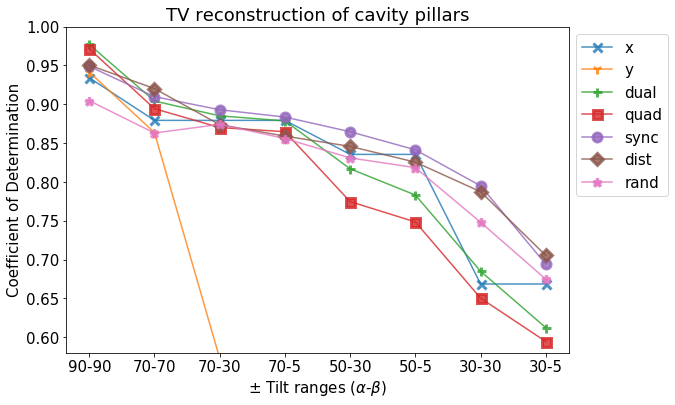

In [39]:
ranges = [(90,90),(70,70),(70,30),(70,5),(50,30),(50,5),(30,30),(30,5)]
CODS = []
for r in ranges:
    a,b = r[0],r[1]
    title = r'Parameter tests/pillar schemes n20 TV1/a%i_b%i.npy' %(a,b)
    res = np.load(title)
    cod = res[:,0]
    CODS = np.concatenate((CODS,cod))

fig = plt.figure(figsize=(9,6))

schemes = ['x','y','dual','quad','sync','dist','rand']
markers = ['x','1','+','s','o','D','*']
for i in range(7):
    y = CODS[i::7]
    plt.plot(np.array(y),marker=markers[i],label=schemes[i],markersize=9,alpha=.8,markeredgewidth=3)
    

plt.legend(bbox_to_anchor=(1,1))
ax = plt.gca()
ax.set_xticks([0,1,2,3,4,5,6,7])
ax.set_xticklabels(['90-90','70-70','70-30','70-5','50-30','50-5','30-30','30-5'])
plt.xlabel(r'$\pm$ Tilt ranges ($\alpha$-$\beta$)')
plt.ylabel('Coefficient of Determination')

plt.rcParams.update({'font.size': 15})
plt.ylim([.58,1])
plt.title('TV reconstruction of cavity pillars')

In [63]:
def full_tomo(P,Pn,scheme='x',a=50,b=30,n=20,alg='TV1',na=5,nb=4):
    if scheme == 'dist':
        angles = multi_axis.generate_angles(mode=scheme,x_tilt=(-a,a,na),y_tilt=(-b,b,nb))
    else:
        angles = multi_axis.generate_angles(mode=scheme,x_tilt=(-a,a,n),y_tilt=(-b,b,n),rand=(a,b,2*n))
    raw_data = multi_axis.generate_proj_data(Pn,angles)
    vectors = multi_axis.generate_vectors(angles)
    recon = multi_axis.generate_reconstruction(raw_data,vectors,algorithm=alg)
    recon_vector = multi_axis.reorient_reconstruction(recon)
    return [recon_vector,raw_data,angles]

In [64]:
r = full_tomo(P,Pn,scheme='dist',a=70,b=70,na=8,nb=5)

Started reconstruction... Finished after 1 s


Phantom error:  0.27930317114360226 COD:  0.920201959306


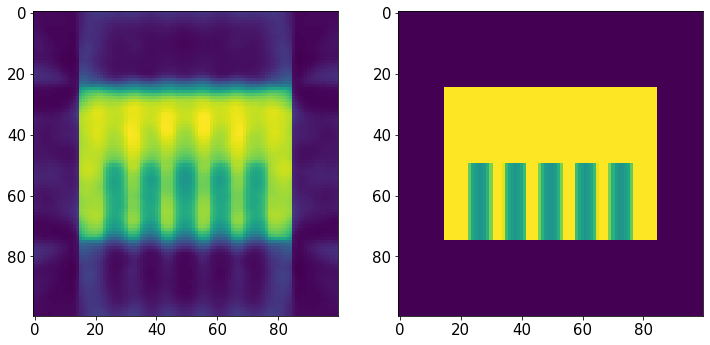

In [65]:
compare_recon_phantom(r[0],P,ax=90,ay=0,az=0)

## Testing